<a href="https://colab.research.google.com/github/BrunoRGutierrez/CouponCollectorProblem/blob/master/Coupon_Collector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code we will develop an algorithm capable to simulate the Coupon Collector's problem (see Mitzenmacher 2017). As show in that book, the expected value to complete the collection of $n$ different coupons is $n\ln(n)+\Theta(1)$. We will check that expected value running our algorithm several times.

# The Coupon Colector algorithmimport numpy as np


In [0]:
import numpy as np

n_coupons = 10   #number of different coupons

def cereal_boxes(n):
  #we will simulate the number of cereal boxes that we need to buy in order to achive the full colection.
  collection = []
  count = 0
  while len(collection) < n:
    new_coupon = np.random.randint(n)
    if new_coupon not in collection:
        collection.append(new_coupon)
        #print(collection)
    count += 1
  return count


In [0]:
def expectation(max_number,running):
#running: number of times that we run the algorithm for each value
#max_number: = the number of the biggest colection of coupons 
    y = [0]
    for j in range(max_number): 
      m = j+1
      avarage = 0
      for i in range(running):
        k= i+1 #we must divide by the numer of iterations
        avarage = avarage + (1/k)* (cereal_boxes(m) - avarage) #calculate the avarage on line
      y.append(avarage)
    return y

**Running the excercise**

In [0]:
running = 100    #number of times that we run the algorithm for each value
max_number = 1000  #the number of the biggest colection of coupons 

simulated_expectation = expectation(max_number,running)

## Graphing the excersice

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


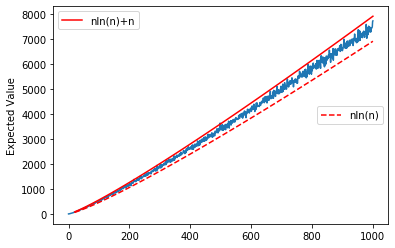

In [0]:
import matplotlib.pyplot as plt
import math

t = linspace(0, max_number)

a = t * np.log(t)
b = t * np.log(t) + t


line3, = plt.plot(simulated_expectation)
line1, = plt.plot(t, a, 'r', label = 'nln(n)', linestyle='--')
line2, = plt.plot(t, b, 'r', label = 'nln(n)+n')
plt.ylabel('Expected Value')


# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc='right')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc='upper left')



plt.show()